In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
%matplotlib inline


In [10]:
import random

In [2]:
df = pd.read_csv('/content/bioresponse.csv')
Y_data = df['Activity']
X_data = df.drop(columns = ['Activity'])
X_1 = X_data.to_numpy()
Y_1 = Y_data.to_numpy()

In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s

In [4]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_1, Y_1, test_size=0.25)

In [6]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    

In [7]:
w, b = initialize_with_zeros(X_train.shape[1])
print(w.shape)
print(X_train.T.shape)
Y_train = np.array([y_train])
print(Y_train.shape)
grads, cost = propagate(w, b, X_train.T, Y_train)
#print(shape)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("# of objects " + str(X_train.T.shape[1]))
print ("cost = " + str(cost))

(1776, 1)
(1776, 2813)
(1, 2813)
dw = [[ 0.00039713]
 [-0.02883808]
 [-0.00869179]
 ...
 [-0.00088873]
 [-0.00444365]
 [-0.00124422]]
db = [-0.03928191]
# of objects 2813
cost = [0.69314718]


In [45]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        k = (random.randrange(w.shape[0]))
        # update rule
        w[k] -=learning_rate*dw[k]
        b -=learning_rate*db
        
        # Record the costs
        if i % 1000 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [43]:
w, b = initialize_with_zeros(X_train.shape[1])
grads, cost = propagate(w, b, X_train.T, Y_train)


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("# of objects " + str(X_train.T.shape[1]))
print ("cost = " + str(cost))

dw = [[ 0.00039713]
 [-0.02883808]
 [-0.00869179]
 ...
 [-0.00088873]
 [-0.00444365]
 [-0.00124422]]
db = [-0.03928191]
# of objects 2813
cost = [0.69314718]


In [46]:
params, grads, costs = optimize(w, b, X_train.T, y_train.T, num_iterations= 40000, learning_rate = 0.4, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 0.679231
Cost after iteration 1000: 0.667251
Cost after iteration 2000: 0.654793
Cost after iteration 3000: 0.647684
Cost after iteration 4000: 0.640368
Cost after iteration 5000: 0.630796
Cost after iteration 6000: 0.625008
Cost after iteration 7000: 0.620138
Cost after iteration 8000: 0.614411
Cost after iteration 9000: 0.609850
Cost after iteration 10000: 0.604613
Cost after iteration 11000: 0.601100
Cost after iteration 12000: 0.597773
Cost after iteration 13000: 0.591913
Cost after iteration 14000: 0.589382
Cost after iteration 15000: 0.584359
Cost after iteration 16000: 0.580034
Cost after iteration 17000: 0.576798
Cost after iteration 18000: 0.574654
Cost after iteration 19000: 0.570422
Cost after iteration 20000: 0.566086
Cost after iteration 21000: 0.563838
Cost after iteration 22000: 0.558671
Cost after iteration 23000: 0.555437
Cost after iteration 24000: 0.551983
Cost after iteration 25000: 0.548651
Cost after iteration 26000: 0.546716
Cost after ite

In [47]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction

In [48]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array 
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array 
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [52]:
d = model(X_train.T, y_train.T, X_test.T, y_test.T, num_iterations = 40000, learning_rate = 0.4, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.672497
Cost after iteration 2000: 0.653778
Cost after iteration 3000: 0.640664
Cost after iteration 4000: 0.628780
Cost after iteration 5000: 0.622370
Cost after iteration 6000: 0.617437
Cost after iteration 7000: 0.611801
Cost after iteration 8000: 0.606004
Cost after iteration 9000: 0.598186
Cost after iteration 10000: 0.591936
Cost after iteration 11000: 0.586929
Cost after iteration 12000: 0.581399
Cost after iteration 13000: 0.578557
Cost after iteration 14000: 0.575301
Cost after iteration 15000: 0.572706
Cost after iteration 16000: 0.569868
Cost after iteration 17000: 0.567840
Cost after iteration 18000: 0.563837
Cost after iteration 19000: 0.560111
Cost after iteration 20000: 0.558099
Cost after iteration 21000: 0.554868
Cost after iteration 22000: 0.552870
Cost after iteration 23000: 0.549915
Cost after iteration 24000: 0.548026
Cost after iteration 25000: 0.546334
Cost after iteration 26000: 0.544479
Cost after ite

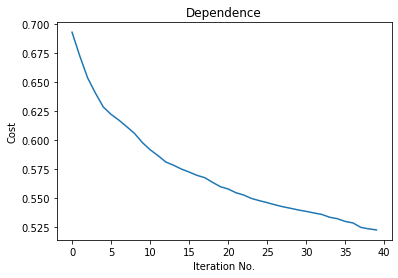

In [53]:
plt.plot(np.arange(d["num_iterations"]/1000),d["costs"])
plt.xlabel('Iteration No.')
plt.ylabel('Cost')
plt.title('Dependence')
plt.show()

On average, in the case of optimization by the SKD method, the error also decreases, although not so smoothly. And acuracy is a bit lower than in case of classic GD and test data
